In [1]:
import pink
import tools
import numpy as np

images = np.load("../data/shapes/boxes.npy").astype(np.float32)
images = np.append(images, np.load("../data/shapes/circles.npy").astype(np.float32), axis=0)
images = np.append(images, np.load("../data/shapes/crosses.npy").astype(np.float32), axis=0)
images = np.append(images, np.load("../data/shapes/triangles.npy").astype(np.float32), axis=0)
np.random.shuffle(images)

images /= np.amax(images)
images = np.moveaxis(images.reshape((2,2000,64,64)), 0, -1)

print('shape:     ', images.shape)
print('min value: ', np.amin(images))
print('max value: ', np.amax(images))

shape:      (2000, 64, 64, 2)
min value:  4.752752e-09
max value:  1.0


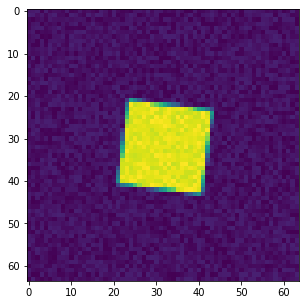

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.imshow(images[0,:,:,0])
plt.grid(False)

In [3]:
import math

som_dim = 2
neuron_dim = int(images.shape[1] / math.sqrt(2.0) * 2.0)
euclid_dim = int(images.shape[1] * math.sqrt(2.0) / 2.0)
number_of_channnels = images.shape[3]

print("neuron_dim = ", neuron_dim)
print("euclid_dim = ", euclid_dim)

np_som = np.random.rand(som_dim, som_dim, neuron_dim, neuron_dim, number_of_channnels).astype(np.float32)
som = pink.SOM(np_som, neuron_layout="cartesian-3d")

trainer = pink.Trainer(som, number_of_rotations=180,
                       euclidean_distance_dim=euclid_dim)

neuron_dim =  90
euclid_dim =  45


In [4]:
from tqdm import tqdm_notebook

for i in tqdm_notebook(range(200)):
    trainer(pink.Data(images[i], layout="cartesian-3d"))

In [5]:
trainer.update_som()
np_som = np.array(som, copy=True)
print(np_som.shape)

(2, 2, 90, 90, 2)


(2, 90, 2, 90)


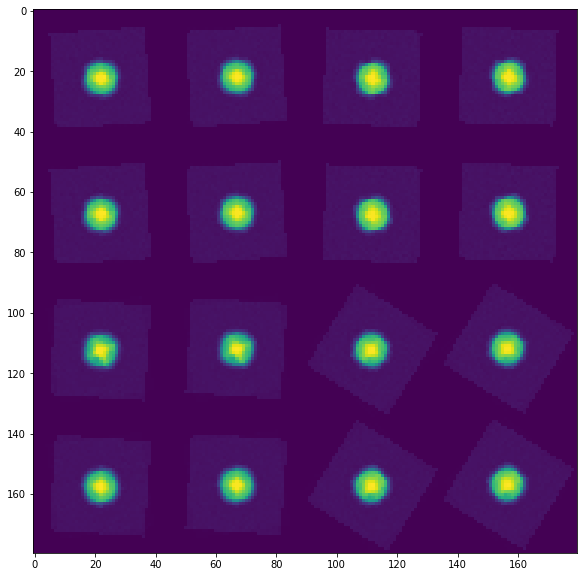

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

print(np_som[:,:,:,:,0].swapaxes(1, 2).shape)

plt.figure(figsize=(10,10))
plt.imshow(np_som[:,:,:,:,1].swapaxes(1, 2).reshape((som_dim * neuron_dim, som_dim * neuron_dim)))
plt.grid(False)